In [517]:
#importing libraries

In [518]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [519]:
#Reading excel
train=pd.read_excel('Flight_Train.Xlsx')

In [520]:
test=pd.read_excel('Flight_Test.Xlsx')

In [521]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [522]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [523]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [524]:
#Data Preprocessing and visualization

In [525]:
#To check for missing values

In [526]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [527]:
#Train has missing values

In [528]:
df_train=train.dropna()

In [529]:
df_train.shape

(10682, 11)

In [530]:
test.isnull().values.any()

False

In [531]:
#To check for duplicates

In [532]:

df_train[df_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [533]:
#Lets drop the duplicated values

In [534]:

df_train.drop_duplicates(keep='first',inplace=True)

In [535]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [536]:
#Cleaning data 

In [537]:
df_train["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [538]:
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})

In [539]:
test["Additional_Info"].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

In [540]:
# convert hours in min for better comparison and data consistency.Since price can also be more on few days so lets divide the duration
df_train['Duration']=  df_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['Duration']=  test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [541]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [542]:
#To split the date of journey

In [543]:
df_train["Day_of_Journey"] = df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train["Journey_month"] = df_train['Date_of_Journey'].str.split('/').str[1].astype(int)
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [544]:
df_train.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3


In [545]:
# Dep_Time
df_train["Departurehour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Departuremin"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [546]:
df_train.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_month,Departurehour,Departuremin
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,3,16,50


In [547]:
# Arrival_Time
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [548]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_month,Departurehour,Departuremin,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [549]:
#Now lets perform the same with the test data

In [550]:
test["Day_of_Journey"] = test['Date_of_Journey'].str.split('/').str[0].astype(int)
test["Journey_month"] = test['Date_of_Journey'].str.split('/').str[1].astype(int)
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [551]:
# Dep_Time
test["Departurehour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Departuremin"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [552]:
# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [553]:
#Total stops

df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [554]:
df_train['Total_Stops'],_ = df_train['Total_Stops'].str.split(' stops').str

In [555]:
df_train['Total_Stops'],_ = df_train['Total_Stops'].str.split(' stop').str

In [556]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_month,Departurehour,Departuremin,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [557]:
df_train['Total_Stops'] = df_train['Total_Stops'].apply(lambda x: 0 if 'non-stop' in x else x)

In [558]:
df_train.Total_Stops=df_train.Total_Stops.astype(int)

In [559]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_month,Departurehour,Departuremin,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [560]:
#To perform the same on test data 

In [561]:
test['Total_Stops'],_ = test['Total_Stops'].str.split(' stops').str

In [562]:
test['Total_Stops'],_ = test['Total_Stops'].str.split(' stop').str

In [563]:
test['Total_Stops'] = test['Total_Stops'].apply(lambda x: 0 if 'non-stop' in x else x)

In [564]:
test.Total_Stops=test.Total_Stops.astype(int)

In [565]:
#Correlation matrix


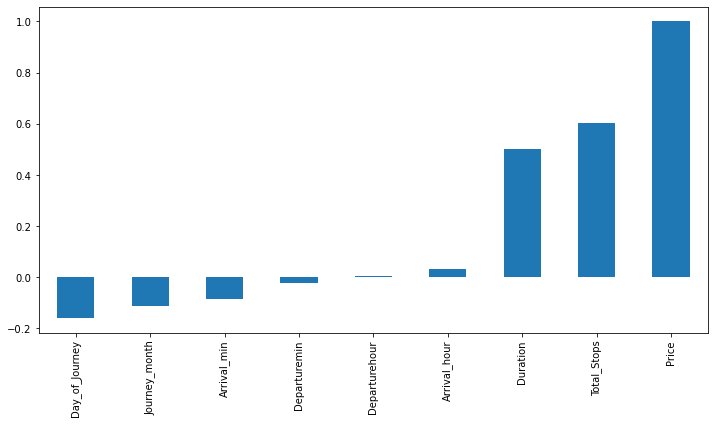

In [566]:
plt.figure(figsize=(12,6))
df_train.corr()['Price'].sort_values().plot(kind='bar');

In [567]:
#Airlines

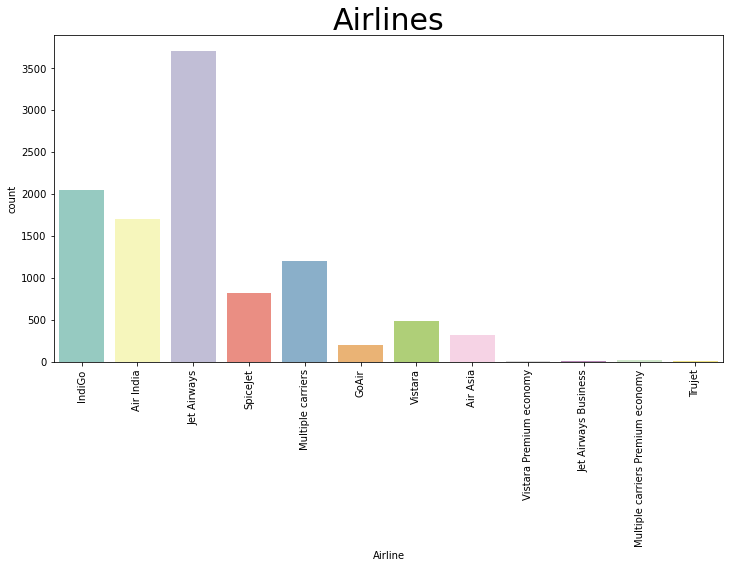

In [568]:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Airline'], palette='Set3')
plt.title('Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

In [569]:
#Airlines vs Price

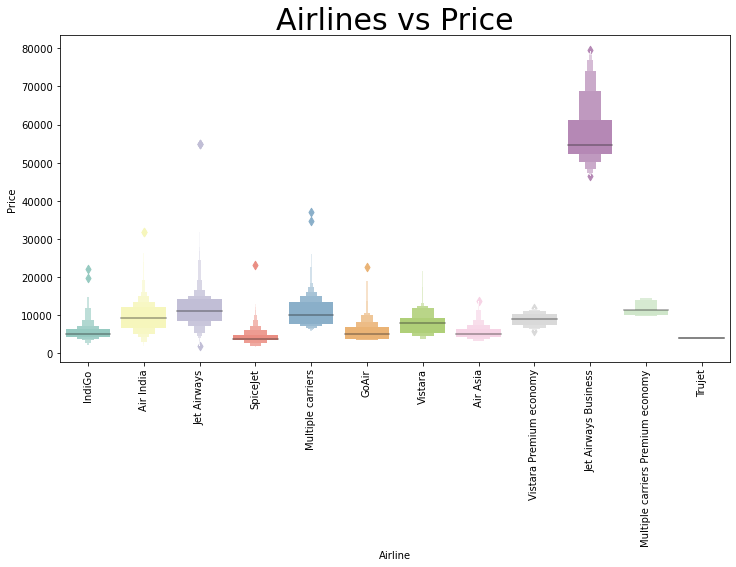

In [570]:
plt.figure(figsize=(12,6))
sns.boxenplot(df_train['Airline'], df_train['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [571]:
#Clearly shows that business class price is way higher

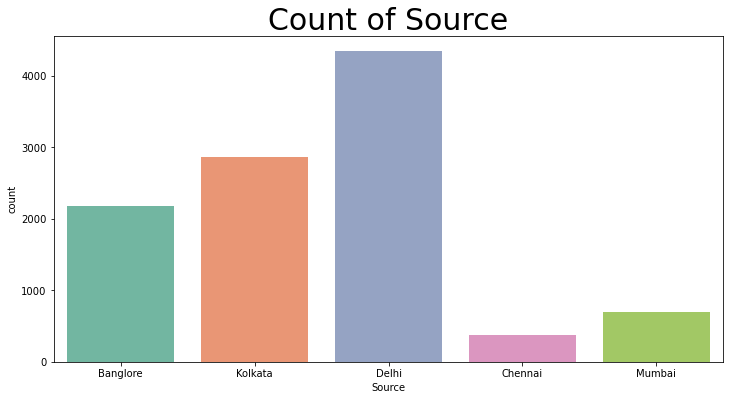

In [572]:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.show()

In [573]:
#As we know the price does vary with sources lets look at it

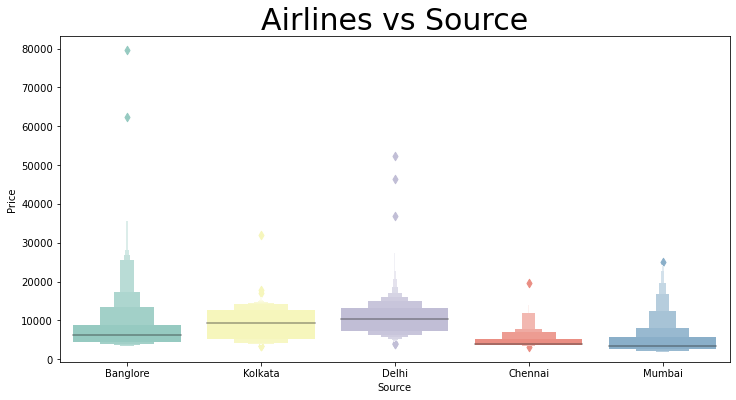

In [574]:
plt.figure(figsize=(12,6))
sns.boxenplot(df_train['Source'], df_train['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.show()

In [575]:
#Prices are high for bangalore followed by delhi, kolkata,Mumbai and then chennai

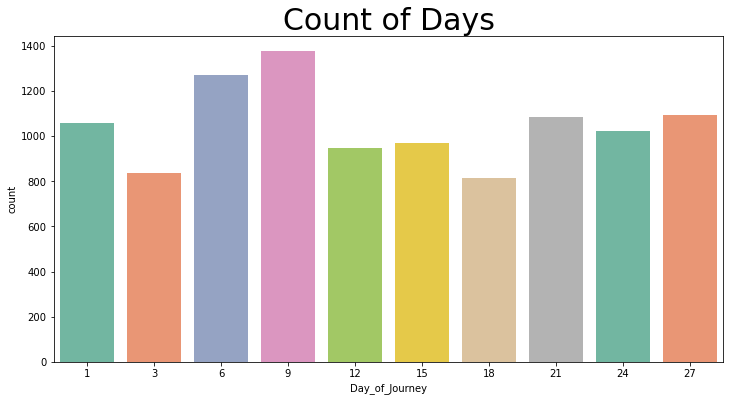

In [576]:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Day_of_Journey'], palette='Set2')
plt.title('Count of Days', size=30)
plt.show()

In [577]:
#Day vs price

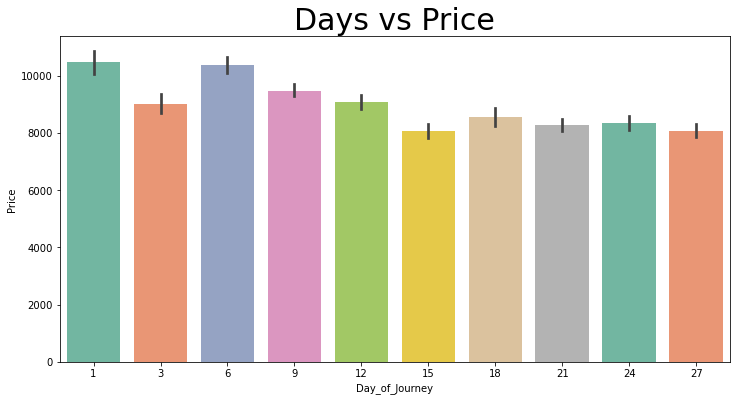

In [578]:
plt.figure(figsize=(12,6))
sns.barplot(df_train['Day_of_Journey'], df_train['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.show()

In [579]:
#It does show that on few days like beginning of the month it does go high in the beginning of the month especially on the 1st

In [580]:
df_train['Journey_month'] = df_train['Journey_month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

In [581]:
#Due to festivals or seasons where there are usual vaccations, marriage ceremony dates the probability pf flight boooking must be higher and the prices as well hence lets look at it

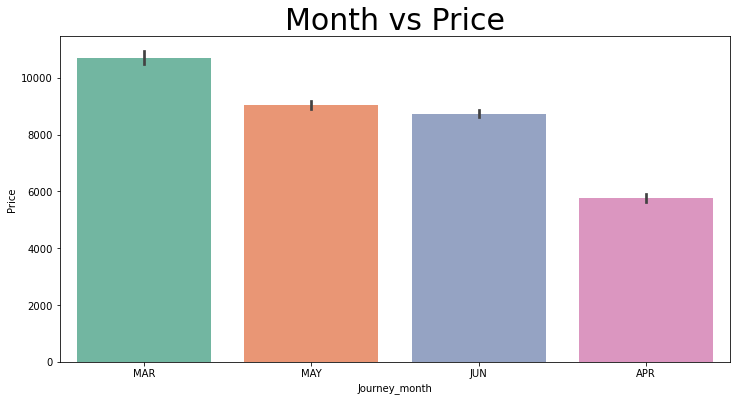

In [582]:
plt.figure(figsize=(12,6))
sns.barplot(df_train['Journey_month'], df_train['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.show()

In [583]:
#This shows that we have highest booking price in March followe dby MAy, June and then so on

In [584]:
#Duration vs Price

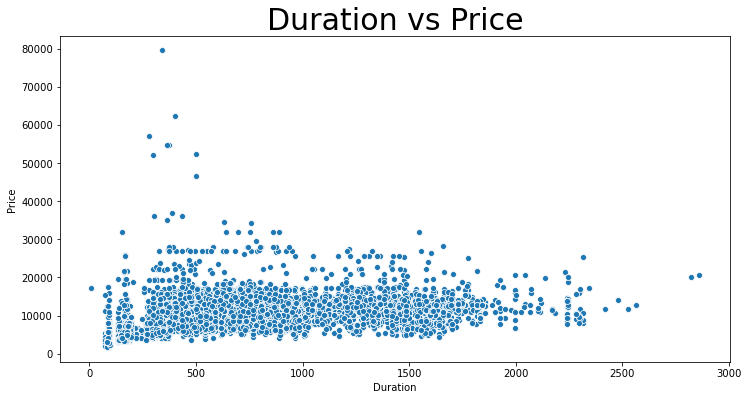

In [585]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_train['Duration'], df_train['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.show()

In [586]:
#with duration being increased prices are going down

In [587]:
#Looking at Stops vs price

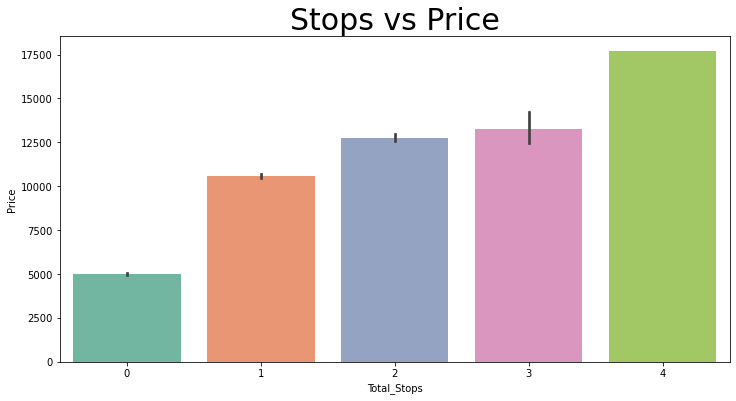

In [588]:
plt.figure(figsize=(12,6))
sns.barplot(df_train['Total_Stops'], df_train['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.show()

In [589]:
#As the number of stops increases so is the distance and hence the price

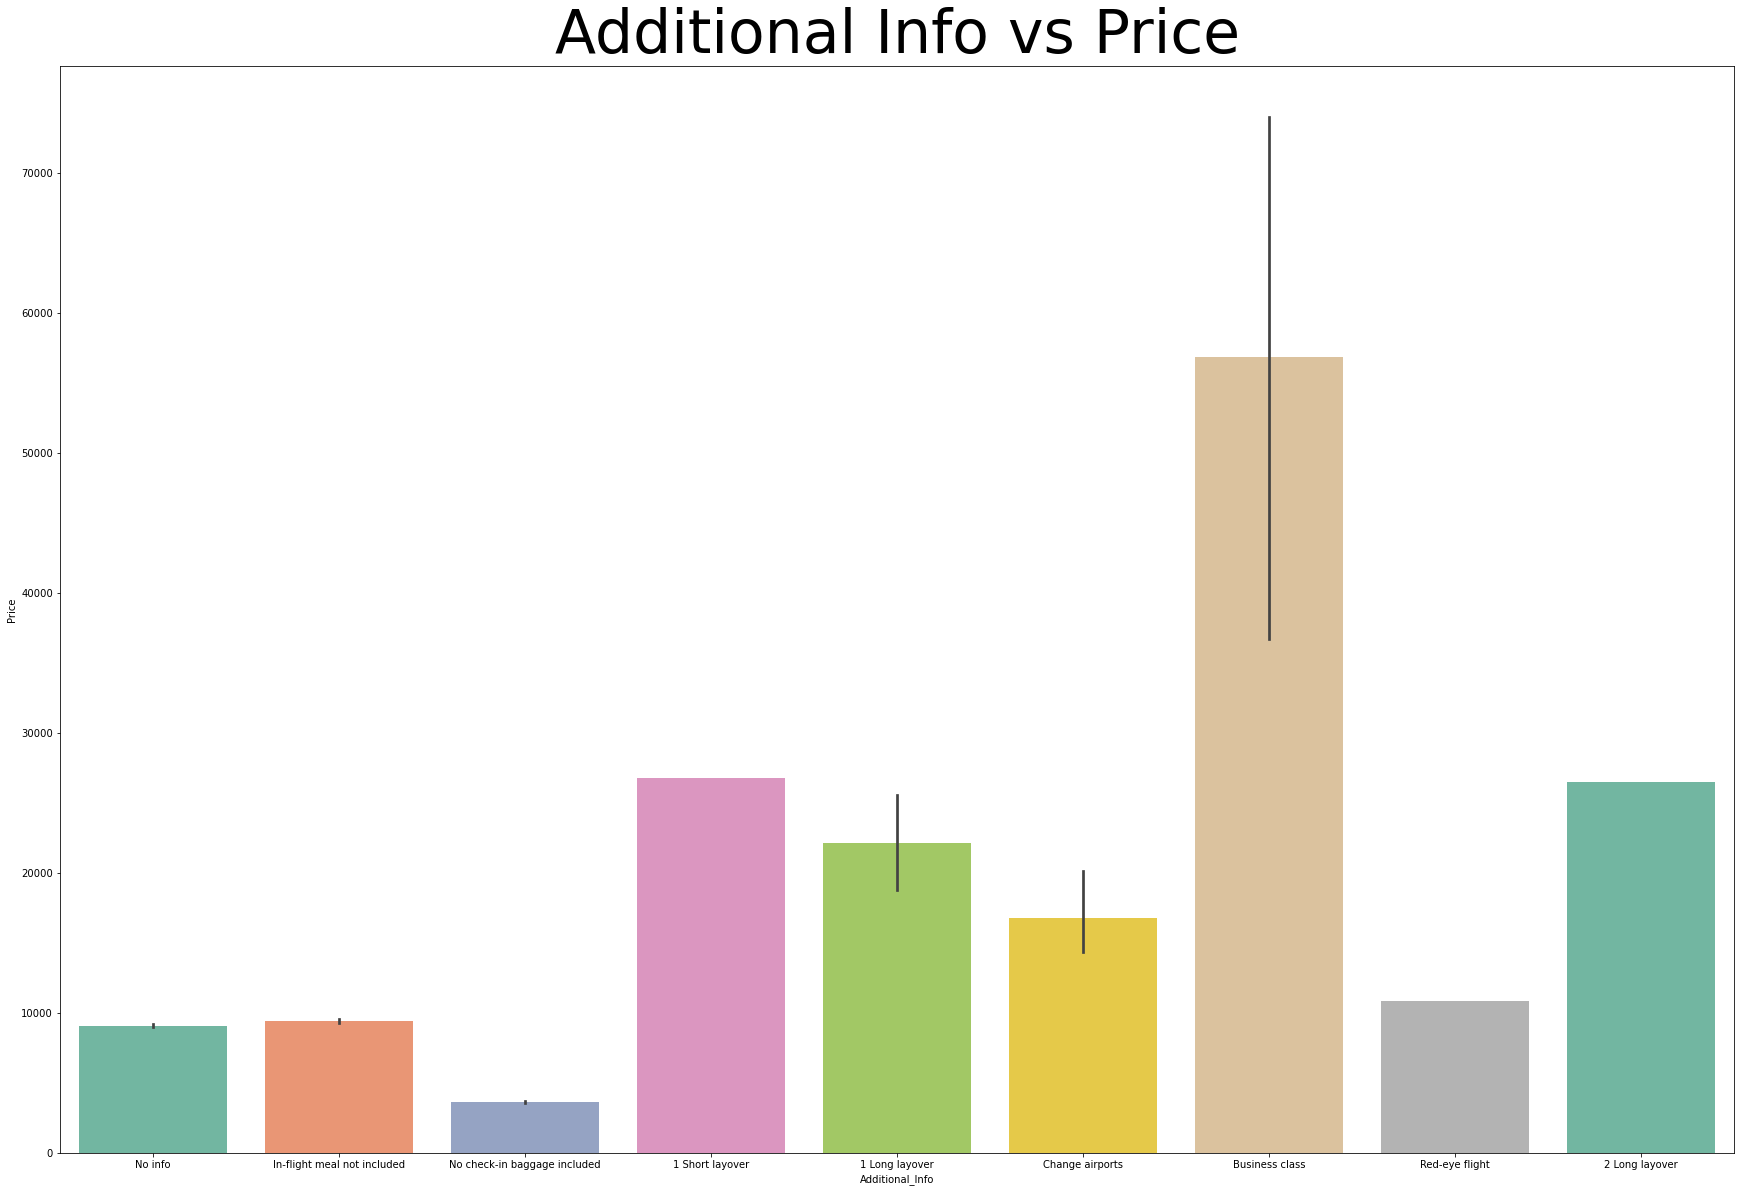

In [590]:
#Additional info vs price
plt.figure(figsize=(30,20))
sns.barplot(df_train['Additional_Info'], df_train['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=60)
plt.show()

In [591]:
#Clearly shows that business class has highest price with lower prices for no check in baggage included .You can refer to the figure for more insights

In [592]:
#We have the source and destination details hence dropping the column Route
df_train.drop(["Route"], axis = 1, inplace = True)

In [593]:
#Convert categorical feature to numerical feature

In [594]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [595]:
train_categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10462 non-null  int32
 1   Source           10462 non-null  int32
 2   Destination      10462 non-null  int32
 3   Additional_Info  10462 non-null  int32
dtypes: int32(4)
memory usage: 565.2 KB


In [596]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Duration         10462 non-null  int64 
 4   Total_Stops      10462 non-null  int32 
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Day_of_Journey   10462 non-null  int32 
 8   Journey_month    10462 non-null  object
 9   Departurehour    10462 non-null  int64 
 10  Departuremin     10462 non-null  int64 
 11  Arrival_hour     10462 non-null  int64 
 12  Arrival_min      10462 non-null  int64 
dtypes: int32(2), int64(6), object(5)
memory usage: 1.4+ MB


In [597]:
df_train['Journey_month'] = df_train['Journey_month'].map({
    'JAN':1,
    'FEB':2,
    'MAR':3,
    'APR':4,
    'MAY':5,
    'JUN':6,
    'JUL':7,
    'AUG':8,
    'SEP':9,
    'OCT':10,
    'NOV':11,
    'DEC':12
})

In [598]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Duration         10462 non-null  int64 
 4   Total_Stops      10462 non-null  int32 
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Day_of_Journey   10462 non-null  int32 
 8   Journey_month    10462 non-null  int64 
 9   Departurehour    10462 non-null  int64 
 10  Departuremin     10462 non-null  int64 
 11  Arrival_hour     10462 non-null  int64 
 12  Arrival_min      10462 non-null  int64 
dtypes: int32(2), int64(7), object(4)
memory usage: 1.4+ MB


In [599]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [600]:
#Categorical data

In [601]:
df1 = df_train.select_dtypes(exclude=['int64', 'float','int32'])

In [602]:
train_categorical_data = df1.apply(LabelEncoder().fit_transform)

In [603]:
train_numerical_data = df_train.select_dtypes(include=['int64', 'float','int32'])

In [604]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Duration         2671 non-null   int64 
 5   Total_Stops      2671 non-null   int32 
 6   Additional_Info  2671 non-null   object
 7   Day_of_Journey   2671 non-null   int32 
 8   Journey_month    2671 non-null   int32 
 9   Departurehour    2671 non-null   int64 
 10  Departuremin     2671 non-null   int64 
 11  Arrival_hour     2671 non-null   int64 
 12  Arrival_min      2671 non-null   int64 
dtypes: int32(3), int64(5), object(5)
memory usage: 240.1+ KB


In [605]:
test_categorical_data = test.select_dtypes(exclude=['int64', 'float','int32'])

In [608]:
test_numerical_data  = test.select_dtypes(include=['int64', 'float','int32'])

In [609]:
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [610]:
train_categorical_data.head()

,Airline,Source,Destination,Additional_Info
0,3,0,5,7
1,1,3,0,7
2,4,2,1,7
3,3,3,0,7
4,3,0,5,7


In [619]:
train_numerical_data.head()

,Duration,Total_Stops,Price,Day_of_Journey,Journey_month,Departurehour,Departuremin,Arrival_hour,Arrival_min
0,170,0,3897,24,3,22,20,1,10
1,445,2,7662,1,5,5,50,13,15
2,1140,2,13882,9,6,9,25,4,25
3,325,1,6218,12,5,18,5,23,30
4,285,1,13302,1,3,16,50,21,35


In [621]:
train_numerical_data.drop(["Price"], axis = 1, inplace = True)

In [622]:
train_numerical_data.head()

,Duration,Total_Stops,Day_of_Journey,Journey_month,Departurehour,Departuremin,Arrival_hour,Arrival_min
0,170,0,24,3,22,20,1,10
1,445,2,1,5,5,50,13,15
2,1140,2,9,6,9,25,4,25
3,325,1,12,5,18,5,23,30
4,285,1,1,3,16,50,21,35


In [623]:
test_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,4,2,1,76,5
1,3,3,0,65,5
2,4,2,1,76,3
3,6,2,1,76,5
4,0,0,2,16,5


In [624]:
test_numerical_data.head()

,Duration,Total_Stops,Day_of_Journey,Journey_month,Departurehour,Departuremin,Arrival_hour,Arrival_min
0,655,1,6,6,17,30,4,25
1,240,1,12,5,6,20,10,20
2,1425,1,21,5,19,15,19,0
3,780,1,21,5,8,0,21,0
4,170,0,24,6,23,55,2,45


In [625]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)

In [626]:
X

,Airline,Source,Destination,Additional_Info,Duration,Total_Stops,Day_of_Journey,Journey_month,Departurehour,Departuremin,Arrival_hour,Arrival_min
0,3,0,5,7,170,0,24,3,22,20,1,10
1,1,3,0,7,445,2,1,5,5,50,13,15
2,4,2,1,7,1140,2,9,6,9,25,4,25
3,3,3,0,7,325,1,12,5,18,5,23,30
4,3,0,5,7,285,1,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,7,150,0,9,4,19,55,22,25
10679,1,3,0,7,155,0,27,4,20,45,23,20
10680,4,0,2,7,180,0,27,4,8,20,11,20
10681,10,0,5,7,160,0,1,3,11,30,14,10


In [627]:
y=df_train['Price']

In [632]:
#Correlation Matrix

In [634]:
df_train.corr()

,Duration,Total_Stops,Price,Day_of_Journey,Journey_month,Departurehour,Departuremin,Arrival_hour,Arrival_min
Duration,1.000000,0.727982,0.501758,-0.029810,0.004874,-0.001285,-0.019225,0.061912,-0.070977
Total_Stops,0.727982,1.000000,0.602013,-0.018937,0.039003,-0.067523,-0.002695,0.051476,-0.107099
Price,0.501758,0.602013,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163
Day_of_Journey,-0.029810,-0.018937,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086
Journey_month,0.004874,0.039003,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261
Departurehour,-0.001285,-0.067523,0.005155,-0.003394,0.040406,1.000000,-0.015068,-0.003827,0.072989
Departuremin,-0.019225,-0.002695,-0.024155,-0.004741,-0.062636,-0.015068,1.000000,0.046564,-0.021353
Arrival_hour,0.061912,0.051476,0.031023,-0.002448,0.001423,-0.003827,0.046564,1.000000,-0.152036
Arrival_min,-0.070977,-0.107099,-0.086163,-0.015086,-0.099261,0.072989,-0.021353,-0.152036,1.000000


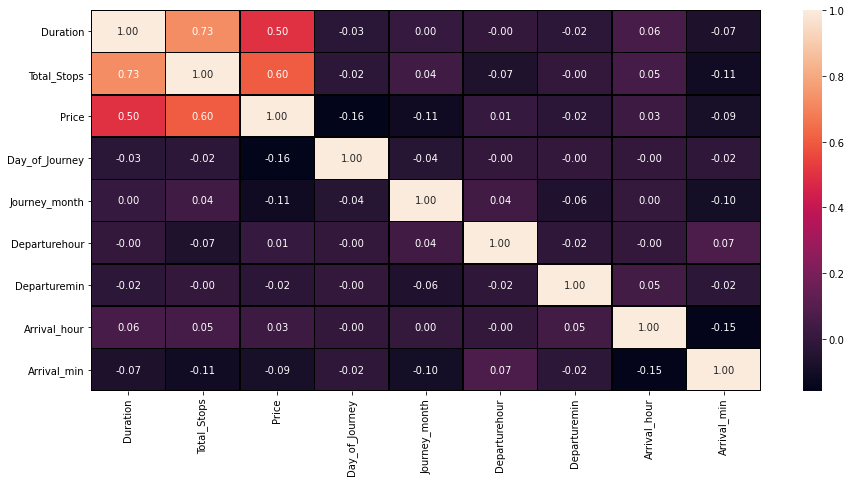

In [636]:

plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(),annot=True,linewidth=.5,linecolor="black",fmt='.2f')

In [628]:
#Building Models

In [637]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [638]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [639]:
### Ridge

In [640]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [641]:
y_train_pred =ridge_regressor.predict(X_train)
y_test_pred =ridge_regressor.predict(X_test)

In [642]:
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Root mean squared error:  3501.400570964963
Mean absolute % error:  32.0
R-squared:  0.43026313001556493


In [643]:
#For test model

In [644]:
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Root mean squared error:  3401.5957490920646
Mean absolute % error:  32.0
R-squared:  0.4450503470303545


In [645]:
#knn 

In [646]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [647]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [648]:
#For training set

In [649]:
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Root mean squared error:  2045.9566375605268
Mean absolute % error:  12.0
R-squared:  0.805471347360174


In [651]:
#Prediction for test

In [652]:
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Root mean squared error:  3033.3995215122923
Mean absolute % errorr:  19.0
R-squared:  0.5586862979494825


In [653]:
#Decision Tree Regressor

In [660]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [655]:
y_train_pred =tree.predict(X_train) #Predict train result
y_test_pred =tree.predict(X_test) #Predict test result

In [656]:
#For training set

In [657]:
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Root mean squared error:  692.5582529829428
Mean absolute % error:  4.0
R-squared:  0.9777103449837576


In [658]:
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Root mean squared error:  1858.8757177124514
Mean absolute % error:  9.0
R-squared:  0.8342746699721354


In [659]:
#XGB Regressor

In [665]:
tuned_params ={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [666]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [667]:
#For training set

In [668]:
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Root mean squared error:  843.046205844192
Mean absolute % error:  7.0
R-squared:  0.9669711475245835


In [669]:
#For test set 

In [670]:
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Root mean squared error:  1528.7560945622445
Mean absolute % error:  9.0
R-squared:  0.8879105890827667


In [671]:
#Random forest regressor

In [676]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [677]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [678]:
#For training set

In [679]:
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Root mean squared error:  894.1170131882366
Mean absolute % error:  4.0
R-squared:  0.9628482354063377


In [680]:
#For test set

In [681]:
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Root mean squared error:  1542.2927784271358
Mean absolute % error:  8.0
R-squared:  0.8859167633428193


In [682]:
#Random Forest Regressor & XGB Regressor are giving Maximum Accuracy as compare to other Regressor algorithm.Saving the Random forest regressor

In [683]:
#Model saving

In [684]:
import pickle
filename='Flightprediction.pkl'
pickle.dump(random_regressor,open(filename,'wb'))